In [1]:
###IMPORTS#############################################
import os, sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.metrics import mean_squared_error
#######################################################

In [2]:
###Build DF from optim_files
particles_list = []
parent_file = os.path.dirname(os.getcwd())
print(parent_file)
#print(os.path.abspath(os.path.join(parent_file + "\controllers\hover_pitch_exp_PSO")))
print(os.path.abspath(os.path.join(parent_file + "\controllers\PID_params_exp_PSO")))

#optim_dir = os.path.normpath(os.path.join(parent_file + "\controllers\PID_params_exp_PSO"))
#optim_dir = os.getcwd() + r"\optim_files"
#optim_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv1_250iters\optim_files"
#optim_dir = os.getcwd() + r"\archived\archived_file_PC_xyposALLv3_70iters\optim_files"
optim_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv2_70iters\optim_files"
#optim_dir = os.getcwd() + r"\archived\archived_file_PC_yawALL_70iters\optim_files"

print(optim_dir)


for path, curr_dir, files in os.walk(optim_dir):
    for file in files:
        if file.startswith("optim_file"):
            print(file)
            particles_list.append(pd.read_csv(optim_dir + "\\" + file, header=None))

particleDF = pd.DataFrame(columns=particles_list[0][0])
for i, particle in enumerate(particles_list):
    print("particle no. {}".format(i))
    particle_dict = pd.pivot_table(particle, values=1, columns=[0]).to_dict('records')
    #particle_temp = pd.pivot_table(particle, values=1, columns=[0])
    particleDF = pd.concat([particleDF, pd.DataFrame.from_records(particle_dict)])
    
print(particleDF.shape)
    
                                     


C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project
C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\controllers\PID_params_exp_PSO
C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\archived\archived_file_PC_throttle_ALLv2_70iters\optim_files
optim_file_0.csv
optim_file_1.csv
optim_file_10.csv
optim_file_11.csv
optim_file_12.csv
optim_file_13.csv
optim_file_14.csv
optim_file_15.csv
optim_file_16.csv
optim_file_17.csv
optim_file_18.csv
optim_file_19.csv
optim_file_2.csv
optim_file_3.csv
optim_file_4.csv
optim_file_5.csv
optim_file_6.csv
optim_file_7.csv
optim_file_8.csv
optim_file_9.csv
particle no. 0
particle no. 1
particle no. 2
particle no. 3
particle no. 4
particle no. 5
particle no. 6
particle no. 7
particle no. 8
particle no. 9
particle no. 10
particle no. 11
pa

In [3]:
print(particleDF.columns)

Index(['QUADCOPTER_TIME_STEP', 'TAKEOFF_THRESHOLD_VELOCITY', 'ROVER_TIME_STEP',
       'k_vertical_thrust', 'k_vertical_offset', 'k_roll_p', 'k_pitch_p',
       'target_altitude', 'x_Kp', 'x_Ki', 'x_Kd', 'y_Kp', 'y_Ki', 'y_Kd',
       'pitch_Kp', 'pitch_Ki', 'pitch_Kd', 'roll_Kp', 'roll_Ki', 'roll_Kd',
       'throttle_Kp', 'throttle_Ki', 'throttle_Kd', 'yaw_Kp', 'yaw_Ki',
       'yaw_Kd', 'rollDot_Kp', 'rollDot_Ki', 'rollDot_Kd', 'pitchDot_Kp',
       'pitchDot_Ki', 'pitchDot_Kd', 'yawDot_Kp', 'yawDot_Ki', 'yawDot_Kd',
       'yaw_setpoint', 'altitude_attainment_factor', 'floor_width',
       'floor_height', 'waypoint_reached_tolerance', 'quadrotor_mass',
       'world_gravity'],
      dtype='object')


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
max: 1.0
min: 1.0
xpos-Kp-avg: 1.0
xpos-Kp-std: 0.0


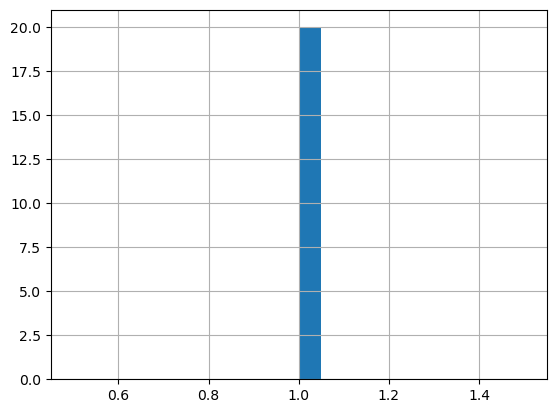

In [4]:
xpos_Kp_arr = np.array(particleDF["x_Kp"])
print(xpos_Kp_arr)
print("max: {}".format(xpos_Kp_arr.max()))
print("min: {}".format(xpos_Kp_arr.min()))
print("xpos-Kp-avg: {}".format(np.mean(xpos_Kp_arr)))
print("xpos-Kp-std: {}".format(np.std(xpos_Kp_arr)))
plt.hist(xpos_Kp_arr, bins=20)
plt.grid()

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
max: 0.001
min: 0.001
xpos-Ki-avg: 0.0010000000000000002
xpos-Ki-std: 2.168404344971009e-19


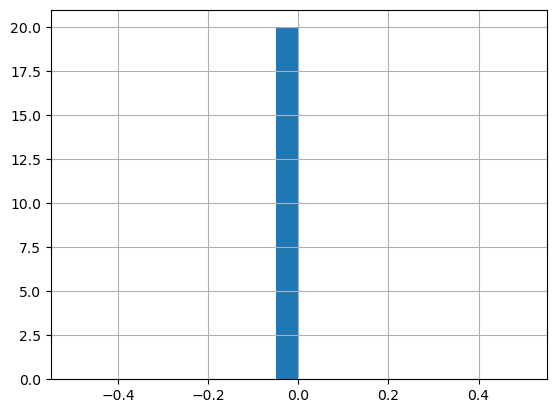

In [5]:
xpos_Ki_arr = np.array(particleDF["x_Ki"])
print(xpos_Ki_arr)
print("max: {}".format(xpos_Ki_arr.max()))
print("min: {}".format(xpos_Ki_arr.min()))
print("xpos-Ki-avg: {}".format(np.mean(xpos_Ki_arr)))
print("xpos-Ki-std: {}".format(np.std(xpos_Ki_arr)))
plt.hist(xpos_Ki_arr, bins=20)
plt.grid()

[0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756
 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756]
max: 0.6756
min: 0.6756
xpos-Kd-avg: 0.6755999999999999
xpos-Kd-std: 1.1102230246251565e-16


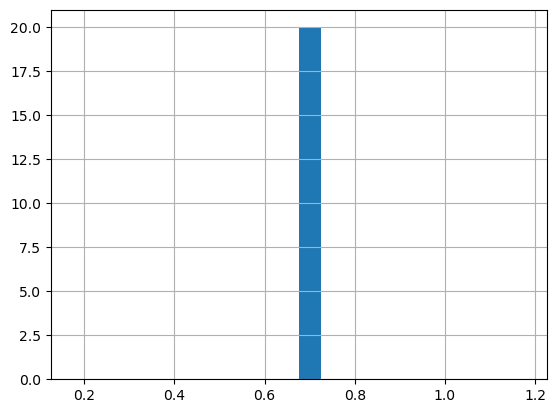

In [6]:
xpos_Kd_arr = np.array(particleDF["x_Kd"])
print(xpos_Kd_arr)
print("max: {}".format(xpos_Kd_arr.max()))
print("min: {}".format(xpos_Kd_arr.min()))
print("xpos-Kd-avg: {}".format(np.mean(xpos_Kd_arr)))
print("xpos-Kd-std: {}".format(np.std(xpos_Kd_arr)))
plt.hist(xpos_Kd_arr, bins=20)
plt.grid()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
max: 1.0
min: 1.0
ypos-Kp-avg: 1.0
ypos-Kp-std: 0.0


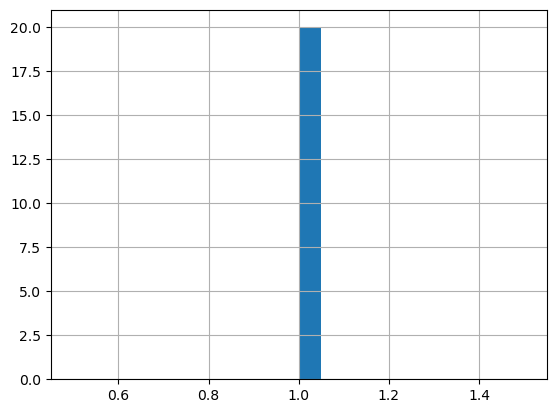

In [7]:
ypos_Kp_arr = np.array(particleDF["y_Kp"])
print(ypos_Kp_arr)
print("max: {}".format(ypos_Kp_arr.max()))
print("min: {}".format(ypos_Kp_arr.min()))
print("ypos-Kp-avg: {}".format(np.mean(ypos_Kp_arr)))
print("ypos-Kp-std: {}".format(np.std(ypos_Kp_arr)))
plt.hist(ypos_Kp_arr, bins=20)
plt.grid()

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
max: 0.001
min: 0.001
ypos-Ki-avg: 0.0010000000000000002
ypos-Ki-std: 2.168404344971009e-19


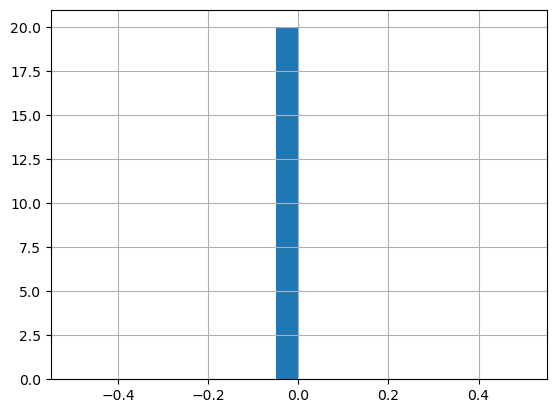

In [8]:
ypos_Ki_arr = np.array(particleDF["y_Ki"])
print(ypos_Ki_arr)
print("max: {}".format(ypos_Ki_arr.max()))
print("min: {}".format(ypos_Ki_arr.min()))
print("ypos-Ki-avg: {}".format(np.mean(ypos_Ki_arr)))
print("ypos-Ki-std: {}".format(np.std(ypos_Ki_arr)))
plt.hist(ypos_Ki_arr, bins=20)
plt.grid()

[0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756
 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756 0.6756]
max: 0.6756
min: 0.6756
ypos-Kd-avg: 0.6755999999999999
ypos-Kd-std: 1.1102230246251565e-16


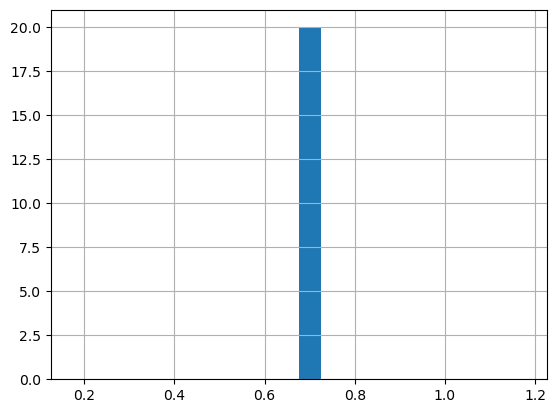

In [9]:
ypos_Kd_arr = np.array(particleDF["y_Kd"])
print(ypos_Kd_arr)
print("max: {}".format(ypos_Kd_arr.max()))
print("min: {}".format(ypos_Kd_arr.min()))
print("ypos-Kd-avg: {}".format(np.mean(ypos_Kd_arr)))
print("ypos-Kd-std: {}".format(np.std(ypos_Kd_arr)))
plt.hist(ypos_Kd_arr, bins=20)
plt.grid()

[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]
max: 0.232
min: 0.232
roll-Kp-avg: 0.23200000000000004
roll-Kp-std: 2.7755575615628914e-17


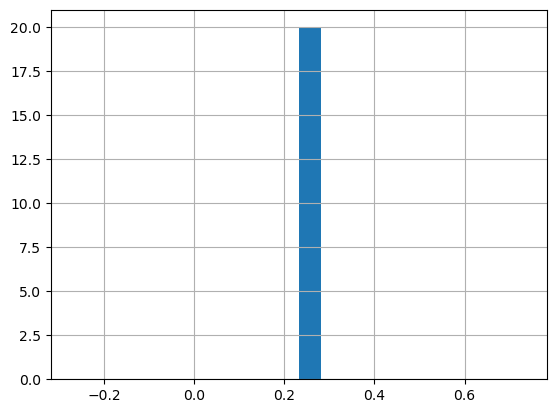

In [10]:
roll_Kp_arr = np.array(particleDF["roll_Kp"])
print(roll_Kp_arr)
print("max: {}".format(roll_Kp_arr.max()))
print("min: {}".format(roll_Kp_arr.min()))
print("roll-Kp-avg: {}".format(np.mean(roll_Kp_arr)))
print("roll-Kp-std: {}".format(np.std(roll_Kp_arr)))
plt.hist(roll_Kp_arr, bins=20)
plt.grid()

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]
max: 0.1
min: 0.1
roll-Ki-avg: 0.10000000000000002
roll-Ki-std: 1.3877787807814457e-17


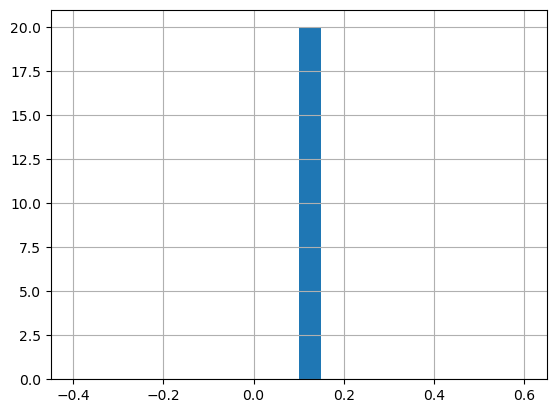

In [11]:
roll_Ki_arr = np.array(particleDF["roll_Ki"])
print(roll_Ki_arr)
print("max: {}".format(roll_Ki_arr.max()))
print("min: {}".format(roll_Ki_arr.min()))
print("roll-Ki-avg: {}".format(np.mean(roll_Ki_arr)))
print("roll-Ki-std: {}".format(np.std(roll_Ki_arr)))
plt.hist(roll_Ki_arr, bins=20)
plt.grid()

[0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722]
max: 0.3722
min: 0.3722
roll-Kd-avg: 0.37220000000000003
roll-Kd-std: 5.551115123125783e-17


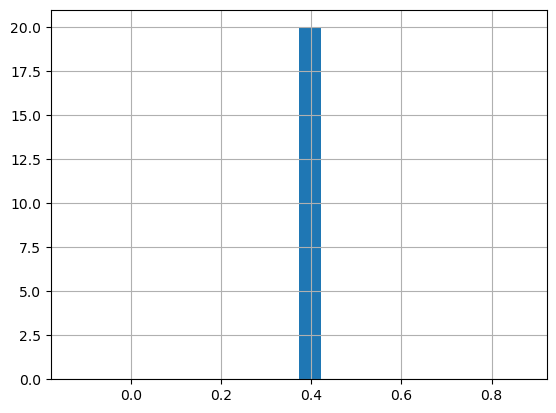

In [12]:
roll_Kd_arr = np.array(particleDF["roll_Kd"])
print(roll_Kd_arr)
print("max: {}".format(roll_Kd_arr.max()))
print("min: {}".format(roll_Kd_arr.min()))
print("roll-Kd-avg: {}".format(np.mean(roll_Kd_arr)))
print("roll-Kd-std: {}".format(np.std(roll_Kd_arr)))
plt.hist(roll_Kd_arr, bins=20)
plt.grid()

[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]
max: 0.232
min: 0.232
pitch-Kp-avg: 0.23200000000000004
pitch-Kp-std: 2.7755575615628914e-17


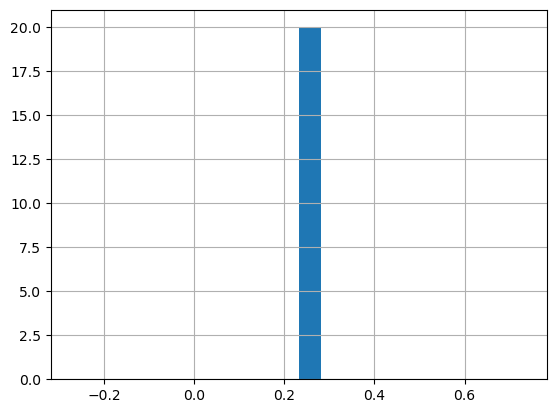

In [13]:
pitch_Kp_arr = np.array(particleDF["pitch_Kp"])
print(pitch_Kp_arr)
print("max: {}".format(pitch_Kp_arr.max()))
print("min: {}".format(pitch_Kp_arr.min()))
print("pitch-Kp-avg: {}".format(np.mean(pitch_Kp_arr)))
print("pitch-Kp-std: {}".format(np.std(pitch_Kp_arr)))
plt.hist(pitch_Kp_arr, bins=20)
plt.grid()

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]
max: 0.1
min: 0.1
pitch-Ki-avg: 0.10000000000000002
pitch-Ki-std: 1.3877787807814457e-17


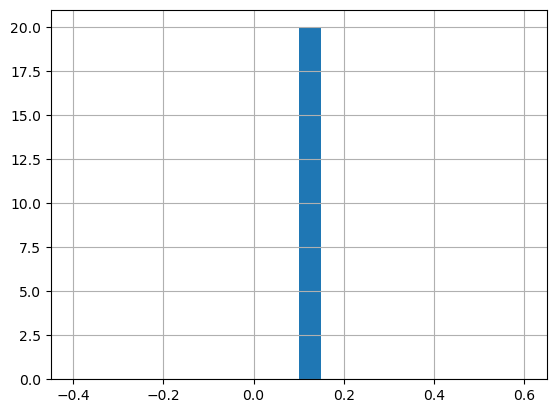

In [14]:
pitch_Ki_arr = np.array(particleDF["pitch_Ki"])
print(pitch_Ki_arr)
print("max: {}".format(pitch_Ki_arr.max()))
print("min: {}".format(pitch_Ki_arr.min()))
print("pitch-Ki-avg: {}".format(np.mean(pitch_Ki_arr)))
print("pitch-Ki-std: {}".format(np.std(pitch_Ki_arr)))
plt.hist(pitch_Ki_arr, bins=20)
plt.grid()

[0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722]
max: 0.3722
min: 0.3722
pitch-Kd-avg: 0.37220000000000003
pitch-Kd-std: 5.551115123125783e-17


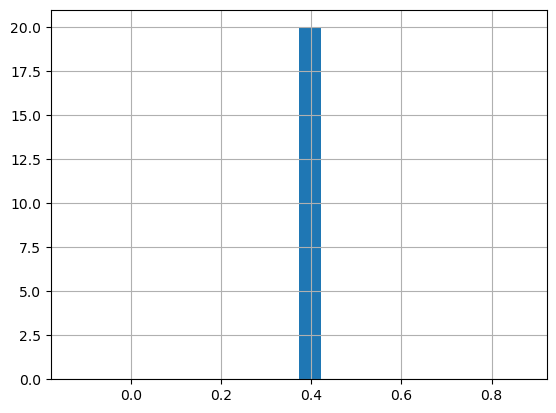

In [15]:
pitch_Kd_arr = np.array(particleDF["pitch_Kd"])
print(pitch_Kd_arr)
print("max: {}".format(pitch_Kd_arr.max()))
print("min: {}".format(pitch_Kd_arr.min()))
print("pitch-Kd-avg: {}".format(np.mean(pitch_Kd_arr)))
print("pitch-Kd-std: {}".format(np.std(pitch_Kd_arr)))
plt.hist(pitch_Kd_arr, bins=20)
plt.grid()

[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]
0.232
0.232
yaw-Kp-avg: 0.23200000000000004
yaw-Kp-std: 2.7755575615628914e-17


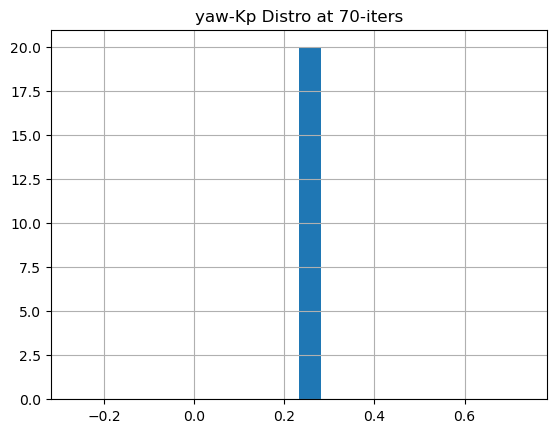

In [16]:
yaw_Kp_arr = np.array(particleDF["yaw_Kp"])
print(yaw_Kp_arr)
print(yaw_Kp_arr.min())
print(yaw_Kp_arr.max())
print("yaw-Kp-avg: {}".format(np.mean(yaw_Kp_arr)))
print("yaw-Kp-std: {}".format(np.std(yaw_Kp_arr)))
plt.title("yaw-Kp Distro at 70-iters")
plt.hist(yaw_Kp_arr, bins=20)
plt.grid()

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]
0.1
0.1
yaw-Ki-avg: 0.10000000000000002
yaw-Ki-std: 1.3877787807814457e-17


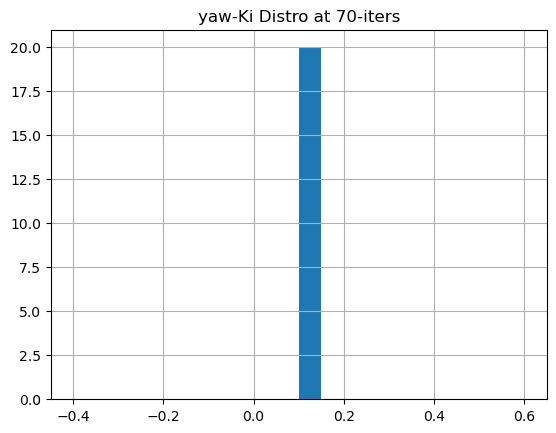

In [17]:
yaw_Ki_arr = np.array(particleDF["yaw_Ki"])
print(yaw_Ki_arr)
print(yaw_Ki_arr.min())
print(yaw_Ki_arr.max())
print("yaw-Ki-avg: {}".format(np.mean(yaw_Ki_arr)))
print("yaw-Ki-std: {}".format(np.std(yaw_Ki_arr)))
plt.title("yaw-Ki Distro at 70-iters")
plt.hist(yaw_Ki_arr, bins=20)
plt.grid()

[0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722]
0.3722
0.3722
yaw-Kd-avg: 0.37220000000000003
yaw-Kd-std: 5.551115123125783e-17


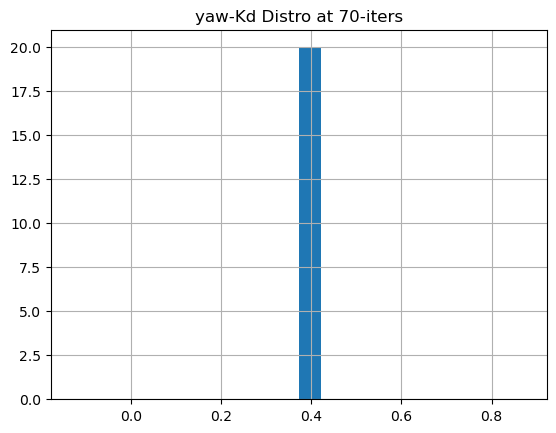

In [18]:
yaw_Kd_arr = np.array(particleDF["yaw_Kd"])
print(yaw_Kd_arr)
print(yaw_Kd_arr.min())
print(yaw_Kd_arr.max())
print("yaw-Kd-avg: {}".format(np.mean(yaw_Kd_arr)))
print("yaw-Kd-std: {}".format(np.std(yaw_Kd_arr)))
plt.title("yaw-Kd Distro at 70-iters")
plt.hist(yaw_Kd_arr, bins=20)
plt.grid()

[1.76896902 1.41030157 1.56849675 1.7942826  1.45852426 1.42870105
 1.77460524 1.46255083 1.56123436 1.45791053 1.40493673 1.46805014
 1.41653331 1.4426568  1.44772806 1.79399898 1.45532844 1.49277975
 1.42870655 1.41086128]
1.4049367329524334
1.794282597013278
throttle-Kp-avg: 1.5223578121253618
throttle-Kp-std: 0.13699978914526093


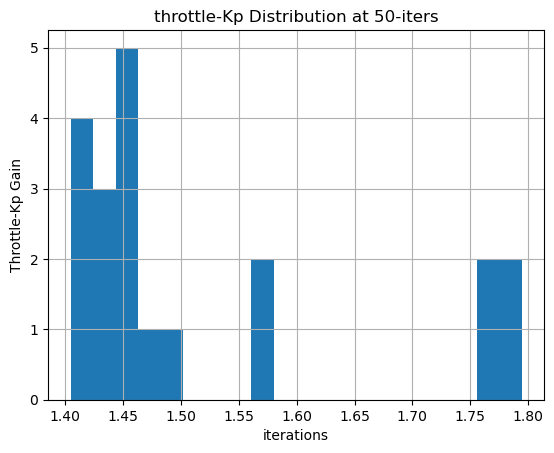

In [19]:
throttle_Kp_arr = np.array(particleDF["throttle_Kp"])
print(throttle_Kp_arr)
print(throttle_Kp_arr.min())
print(throttle_Kp_arr.max())
print("throttle-Kp-avg: {}".format(np.mean(throttle_Kp_arr)))
print("throttle-Kp-std: {}".format(np.std(throttle_Kp_arr)))
plt.hist(throttle_Kp_arr, bins=20)
plt.title("throttle-Kp Distribution at 50-iters")
plt.xlabel("iterations")
plt.ylabel("Throttle-Kp Gain")
plt.grid()

[0.26876445 0.12316037 0.2863276  0.27505425 0.29703546 0.28910618
 0.20045926 0.29041025 0.11459574 0.17561643 0.25525659 0.27363889
 0.10765039 0.28585016 0.17334274 0.23331126 0.1279863  0.15059605
 0.30188202 0.20846612]
0.1076503929839606
0.3018820241888078
throttle-Ki-avg: 0.2219255249094096
throttle-Ki-std: 0.06774792710810953


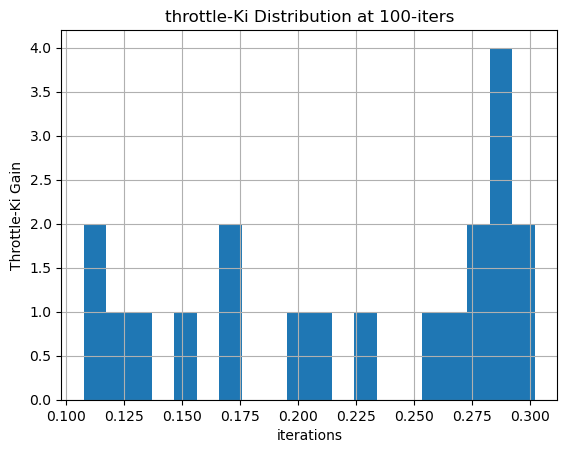

In [20]:
throttle_Ki_arr = np.array(particleDF["throttle_Ki"])
print(throttle_Ki_arr)
print(throttle_Ki_arr.min())
print(throttle_Ki_arr.max())
print("throttle-Ki-avg: {}".format(np.mean(throttle_Ki_arr)))
print("throttle-Ki-std: {}".format(np.std(throttle_Ki_arr)))
plt.title("throttle-Ki Distribution at 100-iters")
plt.xlabel("iterations")
plt.ylabel("Throttle-Ki Gain")
plt.hist(throttle_Ki_arr, bins=20)
plt.grid()

[0.76901764 0.4718445  0.45996219 0.76938042 0.46525442 0.72985271
 0.49083038 0.45819617 0.7527992  0.78089419 0.47303115 0.49206797
 0.41463771 0.78547515 0.48304675 0.78270194 0.40721713 0.46707711
 0.48575517 0.47375567]
0.4072171263166857
0.7854751460073782
throttle-Kd-avg: 0.5706398770712753
throttle-Kd-std: 0.1460440744517967


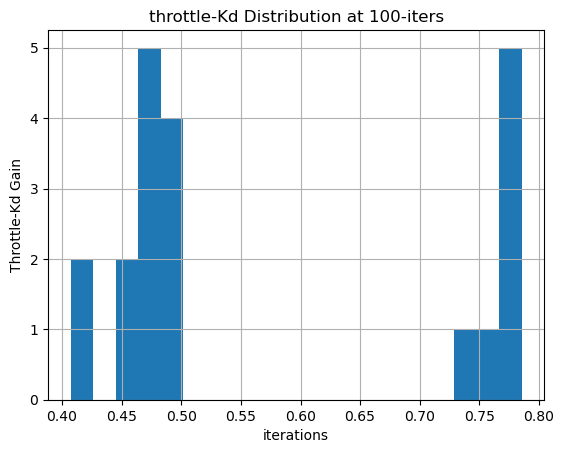

In [21]:
throttle_Kd_arr = np.array(particleDF["throttle_Kd"])
print(throttle_Kd_arr)
print(throttle_Kd_arr.min())
print(throttle_Kd_arr.max())
print("throttle-Kd-avg: {}".format(np.mean(throttle_Kd_arr)))
print("throttle-Kd-std: {}".format(np.std(throttle_Kd_arr)))
plt.title("throttle-Kd Distribution at 100-iters")
plt.xlabel("iterations")
plt.ylabel("Throttle-Kd Gain")
plt.hist(throttle_Kd_arr, bins=20)
plt.grid()

In [22]:
thrtl_params = np.stack((throttle_Kp_arr, throttle_Ki_arr, throttle_Kd_arr), axis=1)
for i, param_pair in enumerate(thrtl_params):
    print("------particle: {}-------------".format(i+1))
    for param in param_pair:
        print(param)

------particle: 1-------------
1.7689690236877
0.268764450442754
0.769017638302847
------particle: 2-------------
1.4103015677883315
0.1231603677296551
0.4718444965560608
------particle: 3-------------
1.568496748340353
0.2863275956606872
0.4599621851573716
------particle: 4-------------
1.794282597013278
0.2750542512801988
0.769380416876917
------particle: 5-------------
1.4585242607164977
0.2970354551237246
0.4652544246681611
------particle: 6-------------
1.4287010501938813
0.2891061790424856
0.7298527067840445
------particle: 7-------------
1.774605242886517
0.2004592574664792
0.4908303800793172
------particle: 8-------------
1.462550825153892
0.2904102531993211
0.4581961667939715
------particle: 9-------------
1.5612343640295758
0.1145957448800961
0.7527992021956306
------particle: 10-------------
1.457910525715703
0.1756164285333206
0.7808941856874682
------particle: 11-------------
1.4049367329524334
0.2552565867772471
0.4730311464851031
------particle: 12-------------
1.4680501

In [23]:
xyPID_params = np.stack((xpos_Kp_arr,
                        xpos_Ki_arr,
                        xpos_Kd_arr,
                        ypos_Kp_arr,
                        ypos_Ki_arr,
                        ypos_Kd_arr),
                       axis=1)
for i, param_pair in enumerate(xyPID_params):
    print("------particle: {}-------------".format(i+1))
    for param in param_pair:
        print(param)

------particle: 1-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 2-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 3-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 4-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 5-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 6-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 7-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 8-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 9-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 10-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 11-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 12-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 13-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 14-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 15-------------
1.0
0.001
0.6756
1.0
0.001
0.6756
------particle: 16-

In [24]:
#check all proportional arrays for values exceeding bounds
p_term_max = 2.0
p_term_min = 0.01
p_terms_dict = {"xpos": xpos_Kp_arr,
              "ypos": ypos_Kp_arr,
              "roll": roll_Kp_arr,
              "pitch": pitch_Kp_arr,
              "yaw": yaw_Kp_arr,
              "throttle": throttle_Kp_arr}
for key, val in p_terms_dict.items():
    val_max = val.max()
    val_min = val.min()
    print("{}: {}, {}".format(key, val_min, val_max))
    if val_max > p_term_max or val_min < p_term_min:
        print("term out of bounds...")


xpos: 1.0, 1.0
ypos: 1.0, 1.0
roll: 0.232, 0.232
pitch: 0.232, 0.232
yaw: 0.232, 0.232
throttle: 1.4049367329524334, 1.794282597013278


In [25]:
#check all integral arrays for values exceeding bounds
i_term_max = 0.01
i_term_min = 0.0001
i_terms_dict = {"xpos": xpos_Ki_arr,
              "ypos": ypos_Ki_arr,
              "roll": roll_Ki_arr,
              "pitch": pitch_Ki_arr,
              "yaw": yaw_Ki_arr,
              "throttle": throttle_Ki_arr}
for key, val in i_terms_dict.items():
    val_max = val.max()
    val_min = val.min()
    print("{}: {}, {}".format(key, val_min, val_max))
    if val_max > i_term_max or val_min < i_term_min:
        print("term out of bounds...")

xpos: 0.001, 0.001
ypos: 0.001, 0.001
roll: 0.1, 0.1
term out of bounds...
pitch: 0.1, 0.1
term out of bounds...
yaw: 0.1, 0.1
term out of bounds...
throttle: 0.1076503929839606, 0.3018820241888078
term out of bounds...


In [26]:
#check all derivative arrays for values exceeding bounds
d_term_max = 1.0
d_term_min = 0.01
d_terms_dict = {"xpos": xpos_Kd_arr,
              "ypos": ypos_Kd_arr,
              "roll": roll_Kd_arr,
              "pitch": pitch_Kd_arr,
              "yaw": yaw_Kd_arr,
              "throttle": throttle_Kd_arr}
for key, val in d_terms_dict.items():
    val_max = val.max()
    val_min = val.min()
    print("{}: {}, {}".format(key, val_min, val_max))
    if val_max > d_term_max or val_min < d_term_min:
        print("term out of bounds...")

xpos: 0.6756, 0.6756
ypos: 0.6756, 0.6756
roll: 0.3722, 0.3722
pitch: 0.3722, 0.3722
yaw: 0.3722, 0.3722
throttle: 0.4072171263166857, 0.7854751460073782


In [27]:
###calculate fitness scores for all observed parameters
xposKp_avg = np.array([])
xposKp_std = np.array([])
xposKi_avg = np.array([])
xposKi_std = np.array([])
xposKd_avg = np.array([])
xposKd_std = np.array([])

yposKp_avg = np.array([])
yposKp_std = np.array([])
yposKi_avg = np.array([])
yposKi_std = np.array([])
yposKd_avg = np.array([])
yposKd_std = np.array([])

rollKp_avg = np.array([])
rollKp_std = np.array([])
rollKi_avg = np.array([])
rollKi_std = np.array([])
rollKd_avg = np.array([])
rollKd_std = np.array([])

pitchKp_avg = np.array([])
pitchKp_std = np.array([])
pitchKi_avg = np.array([])
pitchKi_std = np.array([])
pitchKd_avg = np.array([])
pitchKd_std = np.array([])

yawKp_avg = np.array([])
yawKp_std = np.array([])
yawKi_avg = np.array([])
yawKi_std = np.array([])
yawKd_avg = np.array([])
yawKd_std = np.array([])

throttleKp_avg = np.array([])
throttleKp_std = np.array([])
throttleKi_avg = np.array([])
throttleKi_std = np.array([])
throttleKd_avg = np.array([])
throttleKd_std = np.array([])

#perf_dir = os.getcwd() + r"\archived\archived\param_perf_v1_all_tuning"
#perf_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv1_250iters"
#perf_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv2_70iters"
#perf_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv2_70iters"
#perf_dir = os.getcwd() + r"\archived\archived_file_PC_xyposALLv3_70iters"
perf_dir = os.getcwd() + r"\archived\archived_file_PC_yawALL_70iters"
#print(perf_dir + r"\param_perf_list.npy")

particle_perf = np.load(perf_dir + r"\param_perf_list.npy", allow_pickle=True)
#particle_perf = np.load("param_perf_list.npy", allow_pickle=True)
print(len(particle_perf))
for perf in particle_perf:
    for key, val in perf.items():
        print("{}: {}".format(key, val))
        if key == "x_Kp":
            xposKp_avg = np.append(xposKp_avg, val[0])
            xposKp_std = np.append(xposKp_std, val[1])
        if key == "x_Ki":
            xposKi_avg = np.append(xposKi_avg, val[0])
            xposKi_std = np.append(xposKi_std, val[1])
        if key == "x_Kd":
            xposKd_avg = np.append(xposKd_avg, val[0])
            xposKd_std = np.append(xposKd_std, val[1])
        if key == "y_Kp":
            yposKp_avg = np.append(yposKp_avg, val[0])
            yposKp_std = np.append(yposKp_std, val[1])
        if key == "y_Ki":
            yposKi_avg = np.append(yposKi_avg, val[0])
            yposKi_std = np.append(yposKi_std, val[1])
        if key == "y_Kd":
            yposKd_avg = np.append(yposKd_avg, val[0])
            yposKd_std = np.append(yposKd_std, val[1])
        if key == "roll_Kp":
            rollKp_avg = np.append(rollKp_avg, val[0])
            rollKp_std = np.append(rollKp_std, val[1])
        elif key == "roll_Ki":
            rollKi_avg = np.append(rollKi_avg, val[0])
            rollKi_std = np.append(rollKi_std, val[1])
        elif key == "roll_Kd":
            rollKd_avg = np.append(rollKd_avg, val[0])
            rollKd_std = np.append(rollKd_std, val[1])
        elif key == "pitch_Kp":
            pitchKp_avg = np.append(pitchKp_avg, val[0])
            pitchKp_std = np.append(pitchKp_std, val[1])
        elif key == "pitch_Ki":
            pitchKi_avg = np.append(pitchKi_avg, val[0])
            pitchKi_std = np.append(pitchKi_std, val[1])
        elif key == "pitch_Kd":
            pitchKd_avg = np.append(pitchKd_avg, val[0])
            pitchKd_std = np.append(pitchKd_std, val[1])
        elif key == "yaw_Kp":
            yawKp_avg = np.append(yawKp_avg, val[0])
            yawKp_std = np.append(yawKp_std, val[1])
        elif key == "yaw_Ki":
            yawKi_avg = np.append(yawKi_avg, val[0])
            yawKi_std = np.append(yawKi_std, val[1])
        elif key == "yaw_Kd":
            yawKd_avg = np.append(yawKd_avg, val[0])
            yawKd_std = np.append(yawKd_std, val[1])
        elif key == "throttle_Kp":
            throttleKp_avg = np.append(throttleKp_avg, val[0])
            throttleKp_std = np.append(throttleKp_std, val[1])
        elif key == "throttle_Ki":
            throttleKi_avg = np.append(throttleKi_avg, val[0])
            throttleKi_std = np.append(throttleKi_std, val[1])
        elif key == "throttle_Kd":
            throttleKd_avg = np.append(throttleKd_avg, val[0])
            throttleKd_std = np.append(throttleKd_std, val[1])
    print()

70
x_Kp: (1.363114718764213, 2.220446049250313e-16)
x_Ki: (0.0038528688149332994, 4.336808689942018e-19)
x_Kd: (0.9961133607703578, 2.220446049250313e-16)
y_Kp: (0.943175195197427, 2.220446049250313e-16)
y_Ki: (0.005988905823570799, 8.673617379884035e-19)
y_Kd: (0.8730595673563993, 1.1102230246251565e-16)
roll_Kp: (0.23200000000000004, 2.7755575615628914e-17)
roll_Ki: (0.10000000000000002, 1.3877787807814457e-17)
roll_Kd: (0.37220000000000003, 5.551115123125783e-17)
pitch_Kp: (0.23200000000000004, 2.7755575615628914e-17)
pitch_Ki: (0.10000000000000002, 1.3877787807814457e-17)
pitch_Kd: (0.37220000000000003, 5.551115123125783e-17)
yaw_Kp: (1.2520609277766819, 0.42058123604284947)
yaw_Ki: (0.0574168490578547, 0.02224984315416186)
yaw_Kd: (0.778498886483711, 0.2674377792676066)
throttle_Kp: (1.5223578119999999, 2.220446049250313e-16)
throttle_Ki: (0.22192552499999998, 2.7755575615628914e-17)
throttle_Kd: (0.5706398769999999, 1.1102230246251565e-16)

x_Kp: (1.363114718764213, 2.22044604925

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472 1.36311472
 1.36311472 1.36311472 1.36311472 1.36311472]


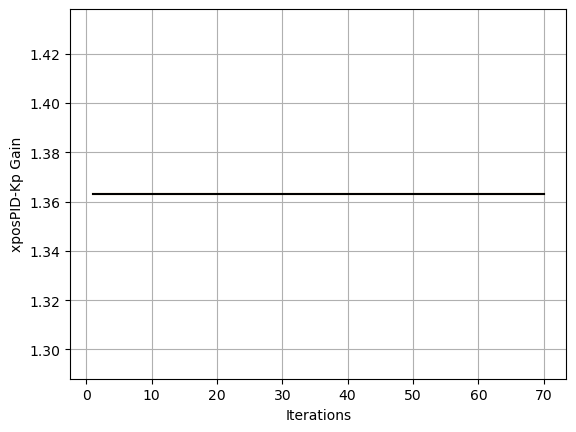

In [28]:
print(len(xposKp_avg))
print(np.linspace(1, len(xposKp_avg), len(xposKp_avg)).astype(int))
print(xposKp_avg)
plt.grid()
x = np.linspace(1, len(xposKp_avg), len(xposKp_avg)).astype(int)
plt.plot(x, xposKp_avg, color='orange')
plt.fill_between(x, xposKp_avg - xposKp_std, xposKp_avg + xposKp_std, alpha=0.5)
plt.errorbar(x, xposKp_avg, yerr=xposKp_std, color='black', ecolor='lightgray', elinewidth=3)
plt.xlabel("Iterations")
plt.ylabel("xposPID-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.220

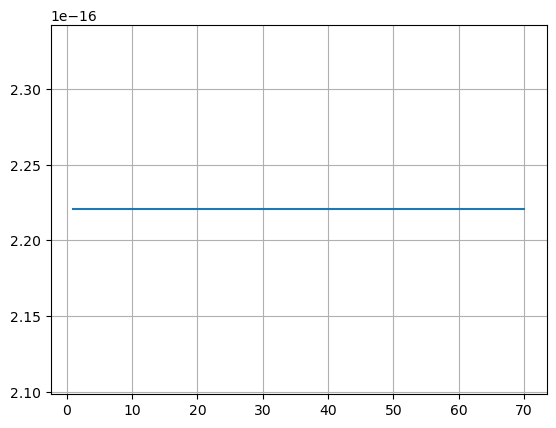

In [29]:
print(len(xposKp_std))
print(np.linspace(1, len(xposKp_std), len(xposKp_std)).astype(int))
print(xposKp_std)
plt.grid()
plt.plot(np.linspace(1, len(xposKp_std), len(xposKp_std)).astype(int), xposKp_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287 0.00385287
 0.00385287 0.00385287 0.00385287 0.00385287]


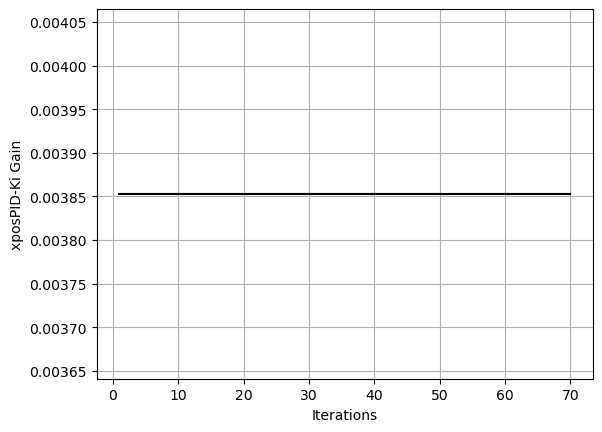

In [30]:
print(len(xposKi_avg))
print(np.linspace(1, len(xposKi_avg), len(xposKi_avg)).astype(int))
print(xposKi_avg)
plt.grid()
x = np.linspace(1, len(xposKi_avg), len(xposKi_avg)).astype(int)
plt.plot(x, xposKi_avg, color='orange')
plt.fill_between(x, xposKi_avg - xposKi_std, xposKi_avg + xposKi_std, alpha=0.5)
plt.errorbar(x, xposKi_avg, yerr=xposKi_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("xposPID-Ki over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("xposPID-Ki Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.33680869e-19
 4.33680869e-19 4.33680869e-19 4.33680869e-19 4.336

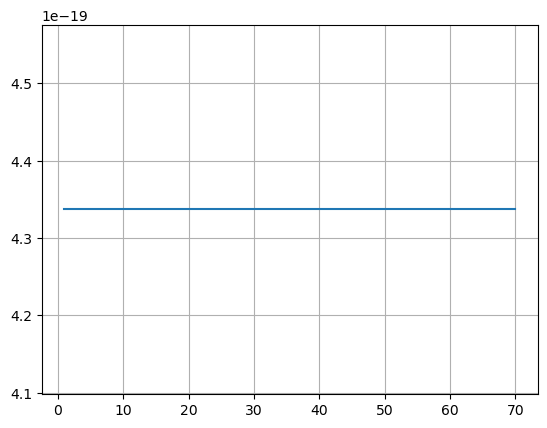

In [31]:
print(len(xposKi_std))
print(np.linspace(1, len(xposKi_std), len(xposKi_std)).astype(int))
print(xposKi_std)
plt.grid()
plt.plot(np.linspace(1, len(xposKi_std), len(xposKi_std)).astype(int), xposKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336 0.99611336
 0.99611336 0.99611336 0.99611336 0.99611336]


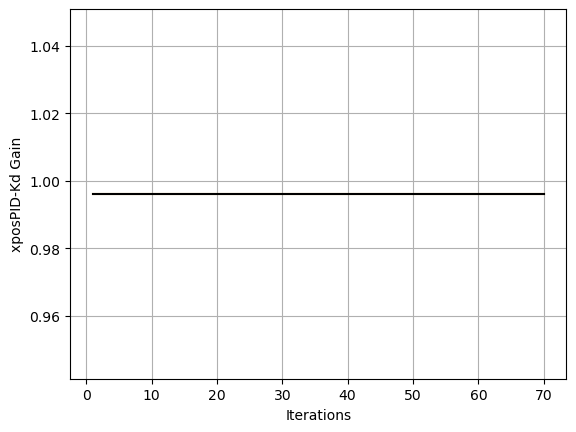

In [32]:
print(len(xposKd_avg))
print(np.linspace(1, len(xposKd_avg), len(xposKd_avg)).astype(int))
print(xposKd_avg)
plt.grid()
x = np.linspace(1, len(xposKd_avg), len(xposKd_avg)).astype(int)
plt.plot(x, xposKd_avg, color='orange')
plt.fill_between(x, xposKd_avg - xposKd_std, xposKd_avg + xposKd_std, alpha=0.5)
plt.errorbar(x, xposKd_avg, yerr=xposKd_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("xposPD-Kd over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("xposPID-Kd Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.220

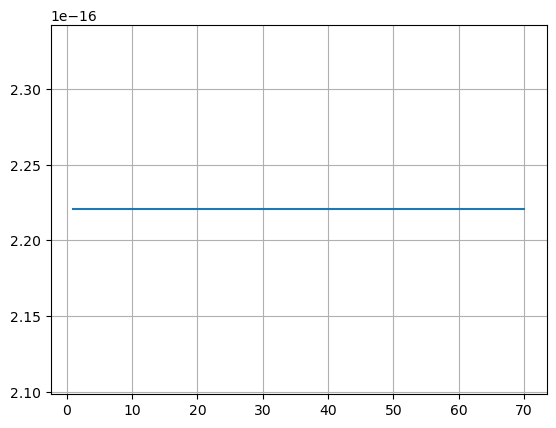

In [33]:
print(len(xposKd_std))
print(np.linspace(1, len(xposKd_std), len(xposKd_std)).astype(int))
print(xposKd_std)
plt.grid()
plt.plot(np.linspace(1, len(xposKd_std), len(xposKd_std)).astype(int), xposKd_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752
 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752 0.9431752]


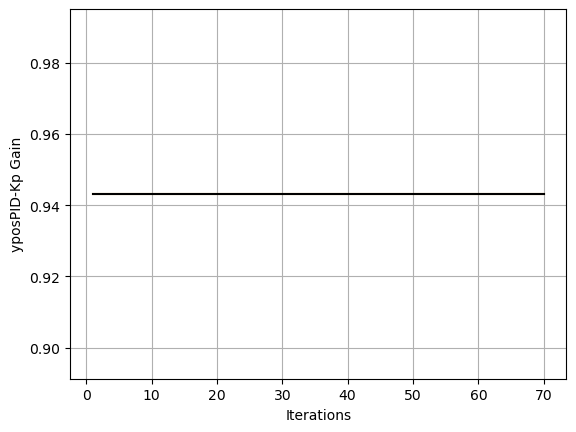

In [34]:
print(len(yposKp_avg))
print(np.linspace(1, len(yposKp_avg), len(yposKp_avg)).astype(int))
print(yposKp_avg)

x = np.linspace(1, len(yposKp_avg), len(yposKp_avg)).astype(int)
plt.plot(x, yposKp_avg, color='orange')
plt.fill_between(x, yposKp_avg - yposKp_std, yposKp_avg + yposKp_std, alpha=0.5)
plt.errorbar(x, yposKp_avg, yerr=yposKp_std, color='black', ecolor='lightgray', elinewidth=3)
plt.grid()
#plt.title("yposPD-Kp over 70 iters (mean, std)")

plt.xlabel("Iterations")
plt.ylabel("yposPID-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.220

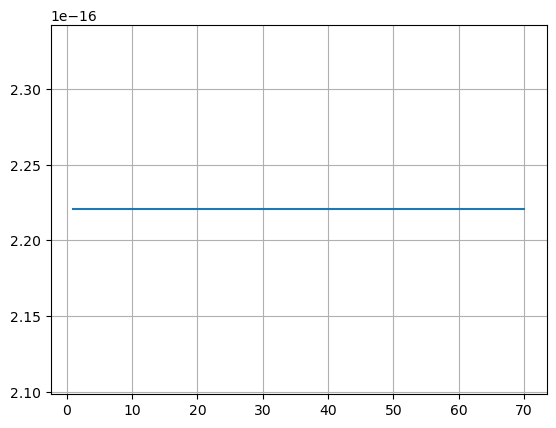

In [35]:
print(len(yposKp_std))
print(np.linspace(1, len(yposKp_std), len(yposKp_std)).astype(int))
print(yposKp_std)
plt.grid()
plt.plot(np.linspace(1, len(yposKp_std), len(yposKp_std)).astype(int), yposKp_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891 0.00598891
 0.00598891 0.00598891 0.00598891 0.00598891]


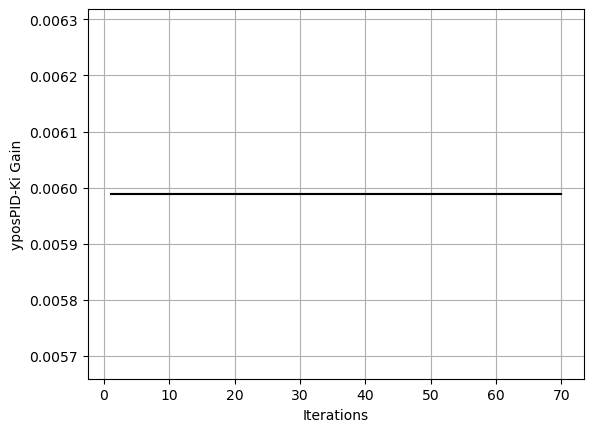

In [36]:
print(len(yposKi_avg))
print(np.linspace(1, len(yposKi_avg), len(yposKi_avg)).astype(int))
print(yposKi_avg)
x = np.linspace(1, len(yposKi_avg), len(yposKi_avg)).astype(int)
plt.grid()
plt.plot(x, yposKi_avg, color='orange')
plt.fill_between(x, yposKi_avg - yposKi_std, yposKi_avg + yposKi_std, alpha=0.5)
plt.errorbar(x, yposKi_avg, yerr=yposKi_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("yposPD-Ki over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("yposPID-Ki Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.67361738e-19
 8.67361738e-19 8.67361738e-19 8.67361738e-19 8.673

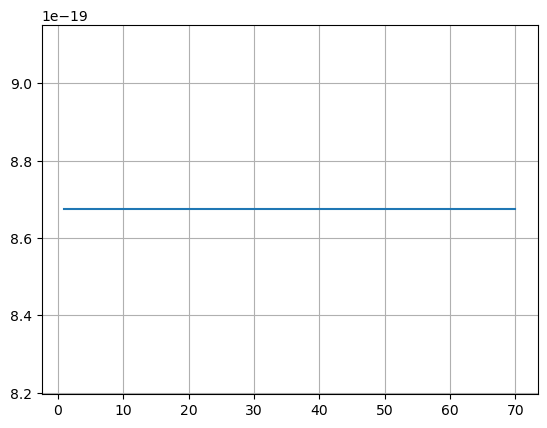

In [37]:
print(len(yposKi_std))
print(np.linspace(1, len(yposKi_std), len(yposKi_std)).astype(int))
print(yposKi_std)
plt.grid()
plt.plot(np.linspace(1, len(yposKi_std), len(yposKi_std)).astype(int), yposKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957 0.87305957
 0.87305957 0.87305957 0.87305957 0.87305957]


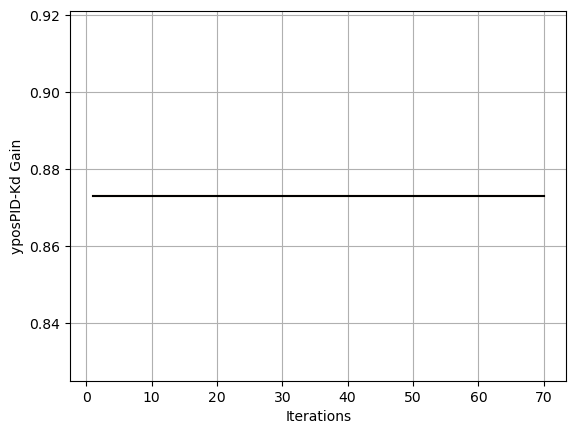

In [38]:
print(len(yposKd_avg))
print(np.linspace(1, len(yposKd_avg), len(yposKd_avg)).astype(int))
print(yposKd_avg)
x = np.linspace(1, len(yposKd_avg), len(yposKd_avg)).astype(int)
plt.grid()
plt.plot(x, yposKd_avg, color='orange')
plt.fill_between(x, yposKd_avg - yposKd_std, yposKd_avg + yposKd_std, alpha=0.5)
plt.errorbar(x, yposKd_avg, yerr=yposKd_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("yposPD-Kd over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("yposPID-Kd Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.110

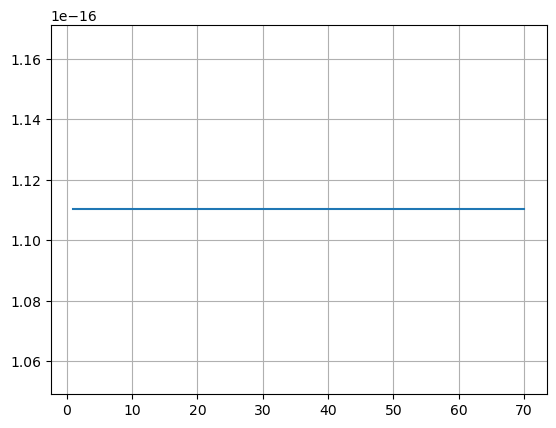

In [39]:
print(len(yposKd_std))
print(np.linspace(1, len(yposKd_std), len(yposKd_std)).astype(int))
print(yposKd_std)
plt.grid()
plt.plot(np.linspace(1, len(yposKd_std), len(yposKd_std)).astype(int), yposKd_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]


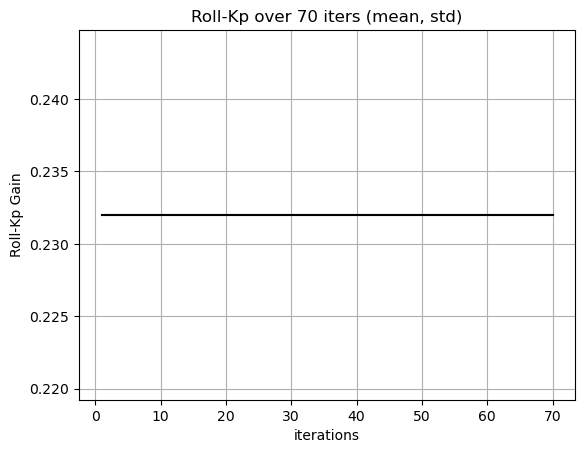

In [40]:
print(len(rollKp_avg))
print(np.linspace(1, len(rollKp_avg), len(rollKp_avg)).astype(int))
print(rollKp_avg)
x = np.linspace(1, len(rollKp_avg), len(rollKp_avg)).astype(int)

plt.grid()
plt.plot(x, rollKp_avg, color='orange')
plt.fill_between(x, rollKp_avg - rollKp_std, rollKp_avg + rollKp_std, alpha=0.5)
plt.errorbar(x, rollKp_avg, yerr=rollKp_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Roll-Kp over 70 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Roll-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.775

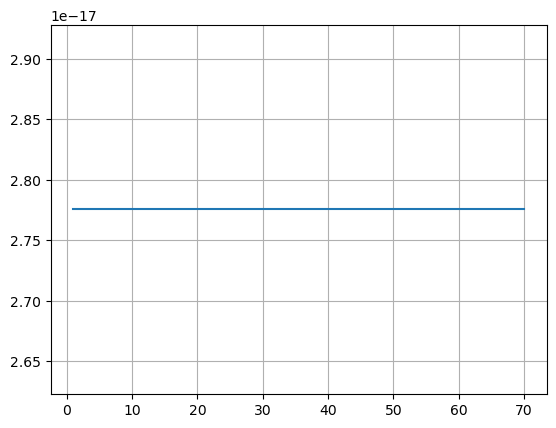

In [41]:
print(len(rollKp_std))
print(np.linspace(1, len(rollKp_std), len(rollKp_std)).astype(int))
print(rollKp_std)
plt.grid()
plt.plot(np.linspace(1, len(rollKp_std), len(rollKp_std)).astype(int), rollKp_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]


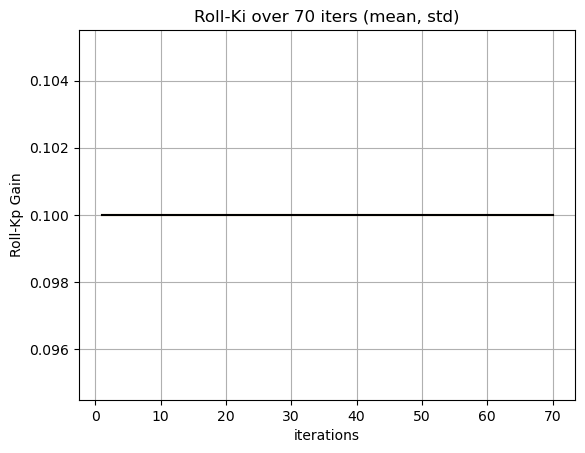

In [42]:
print(len(rollKi_avg))
print(np.linspace(1, len(rollKi_avg), len(rollKi_avg)).astype(int))
print(rollKp_avg)
x = np.linspace(1, len(rollKi_avg), len(rollKi_avg)).astype(int)

plt.grid()
plt.plot(x, rollKi_avg, color='orange')
plt.fill_between(x, rollKi_avg - rollKi_std, rollKi_avg + rollKi_std, alpha=0.5)
plt.errorbar(x, rollKi_avg, yerr=rollKi_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Roll-Ki over 70 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Roll-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.387

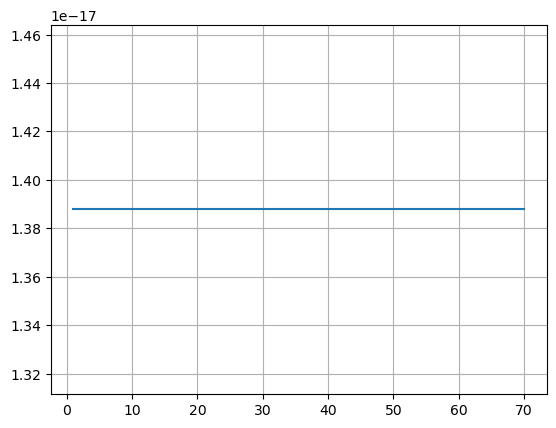

In [43]:
print(len(rollKi_std))
print(np.linspace(1, len(rollKi_std), len(rollKi_std)).astype(int))
print(rollKi_std)
plt.grid()
plt.plot(np.linspace(1, len(rollKi_std), len(rollKi_std)).astype(int), rollKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722]


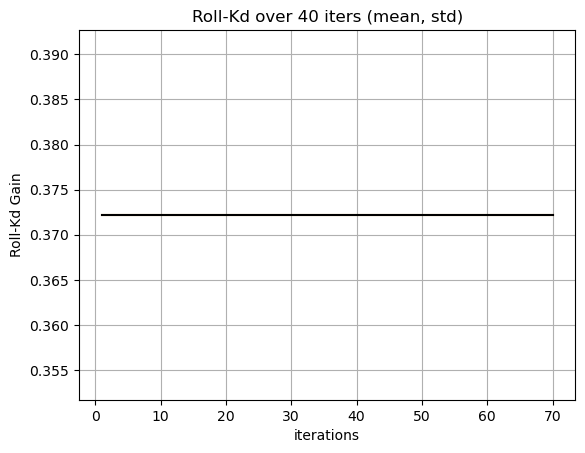

In [44]:
print(len(rollKd_avg))
print(np.linspace(1, len(rollKd_avg), len(rollKd_avg)).astype(int))
print(rollKd_avg)
x = np.linspace(1, len(rollKd_avg), len(rollKd_avg)).astype(int)
plt.grid()
plt.plot(x, rollKd_avg, color='orange')
plt.fill_between(x, rollKd_avg - rollKd_std, rollKd_avg + rollKd_std, alpha=0.5)
plt.errorbar(x, rollKd_avg, yerr=rollKd_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Roll-Kd over 40 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Roll-Kd Gain")
plt.show()



70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.551

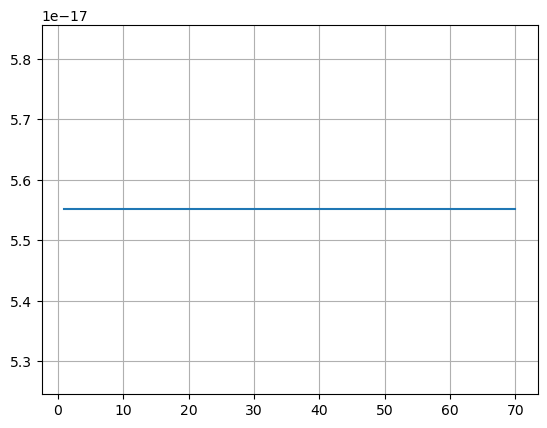

In [45]:
print(len(rollKd_std))
print(np.linspace(1, len(rollKd_std), len(rollKd_std)).astype(int))
print(rollKd_std)
plt.grid()
plt.plot(np.linspace(1, len(rollKd_std), len(rollKd_std)).astype(int), rollKd_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232
 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232 0.232]


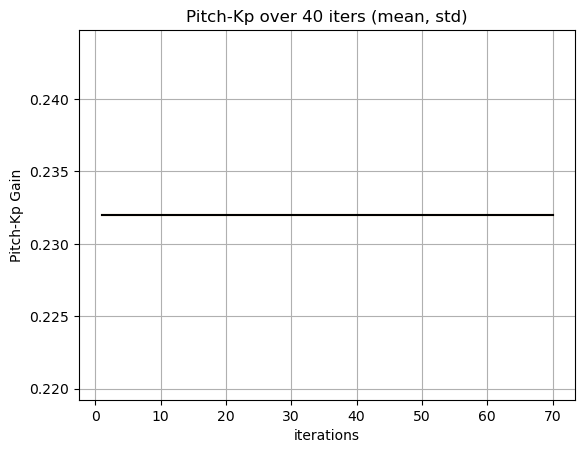

In [46]:
print(len(pitchKp_avg))
print(np.linspace(1, len(pitchKp_avg), len(pitchKp_avg)).astype(int))
print(pitchKp_avg)
x = np.linspace(1, len(pitchKp_avg), len(pitchKp_avg)).astype(int)
#plt.plot(np.linspace(1, len(pitchKp_avg), len(pitchKp_avg)).astype(int), pitchKp_avg)

plt.grid()
plt.plot(x, pitchKp_avg, color='orange')
plt.fill_between(x, pitchKp_avg - pitchKp_std, pitchKp_avg + pitchKp_std, alpha=0.5)
plt.errorbar(x, pitchKp_avg, yerr=pitchKp_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Pitch-Kp over 40 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Pitch-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.775

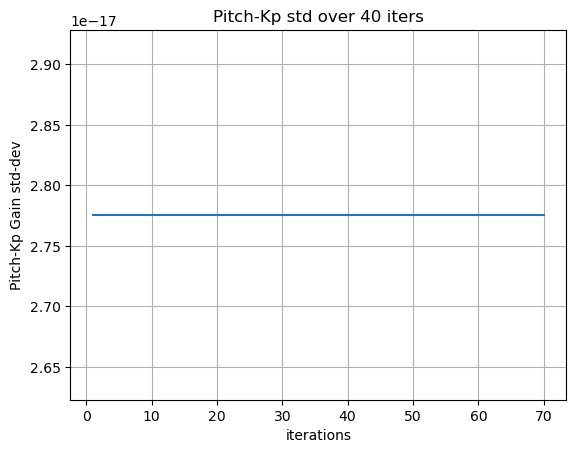

In [47]:
print(len(pitchKp_std))
print(np.linspace(1, len(pitchKp_std), len(pitchKp_std)).astype(int))
print(pitchKp_std)
plt.grid()
plt.plot(np.linspace(1, len(pitchKp_std), len(pitchKp_std)).astype(int), pitchKp_std)
plt.title("Pitch-Kp std over 40 iters")
plt.xlabel("iterations")
plt.ylabel("Pitch-Kp Gain std-dev")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


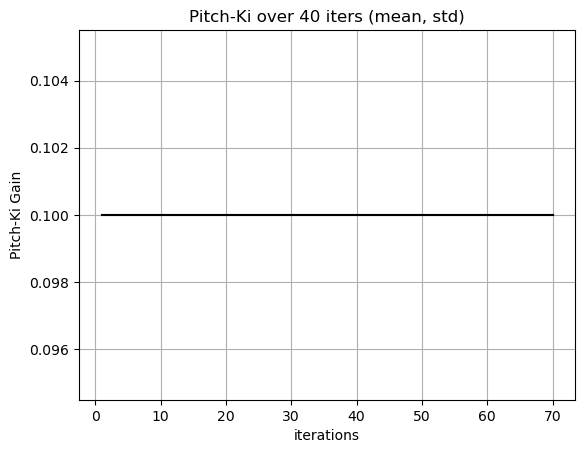

In [48]:
print(len(pitchKi_avg))
print(np.linspace(1, len(pitchKi_avg), len(pitchKi_avg)).astype(int))
print(pitchKi_avg)
x = np.linspace(1, len(pitchKi_avg), len(pitchKi_avg)).astype(int)
#plt.plot(np.linspace(1, len(pitchKp_avg), len(pitchKp_avg)).astype(int), pitchKp_avg)

plt.grid()
plt.plot(x, pitchKi_avg, color='orange')
plt.fill_between(x, pitchKi_avg - pitchKi_std, pitchKi_avg + pitchKi_std, alpha=0.5)
plt.errorbar(x, pitchKi_avg, yerr=pitchKi_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Pitch-Ki over 40 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Pitch-Ki Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.38777878e-17
 1.38777878e-17 1.38777878e-17 1.38777878e-17 1.387

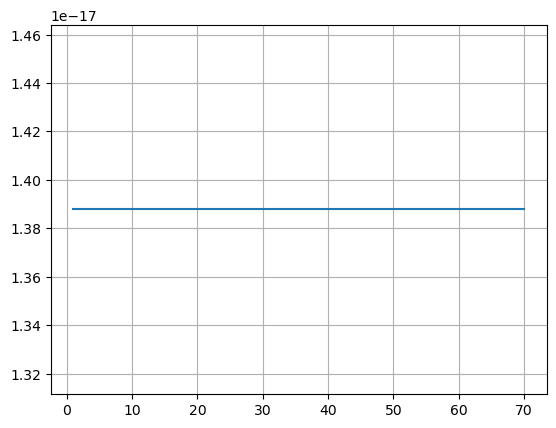

In [49]:
print(len(pitchKi_std))
print(np.linspace(1, len(pitchKi_std), len(pitchKi_std)).astype(int))
print(pitchKi_std)
plt.grid()
plt.plot(np.linspace(1, len(pitchKi_std), len(pitchKi_std)).astype(int), pitchKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722
 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722 0.3722]


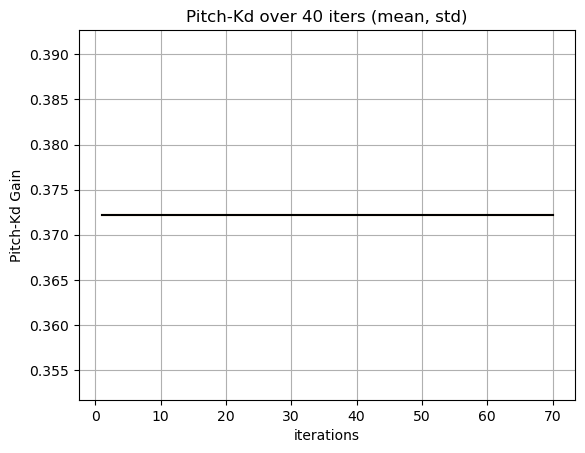

In [50]:
print(len(pitchKd_avg))
print(np.linspace(1, len(pitchKd_avg), len(pitchKd_avg)).astype(int))
print(pitchKd_avg)
x = np.linspace(1, len(pitchKd_avg), len(pitchKd_avg)).astype(int)
#plt.plot(np.linspace(1, len(pitchKp_avg), len(pitchKp_avg)).astype(int), pitchKp_avg)

plt.grid()
plt.plot(x, pitchKd_avg, color='orange')
plt.fill_between(x, pitchKd_avg - pitchKd_std, pitchKd_avg + pitchKd_std, alpha=0.5)
plt.errorbar(x, pitchKd_avg, yerr=pitchKd_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Pitch-Kd over 40 iters (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Pitch-Kd Gain")
plt.show()




70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.55111512e-17
 5.55111512e-17 5.55111512e-17 5.55111512e-17 5.551

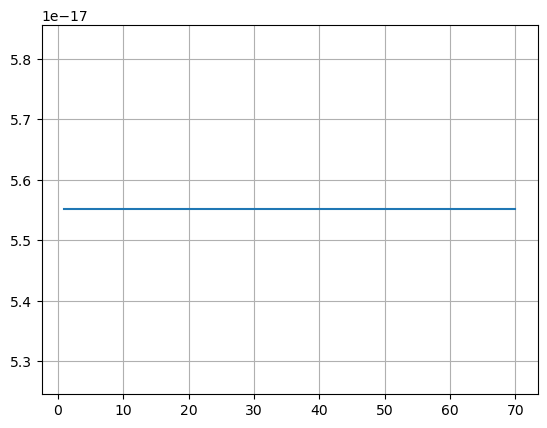

In [51]:
print(len(pitchKd_std))
print(np.linspace(1, len(pitchKd_std), len(pitchKd_std)).astype(int))
print(pitchKd_std)
plt.grid()
plt.plot(np.linspace(1, len(pitchKd_std), len(pitchKd_std)).astype(int), pitchKd_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.25206093 1.25206093 1.25216093 0.98223093 0.98233093 0.84741593
 0.84751593 0.84761593 0.84771593 0.84781593 0.84791593 0.84801593
 0.88811093 0.88821093 0.84330593 0.84340593 0.84350593 0.84360593
 0.84370593 0.84380593 0.84390593 0.84400593 0.84410593 0.84420593
 0.84430593 0.84440593 0.84450593 0.84460593 0.84470593 0.84480593
 0.84490593 0.84500593 0.84510593 0.84520593 0.84530593 0.84540593
 0.84550593 0.84560593 0.84570593 0.84580593 0.84590593 0.84600593
 0.84610593 0.84620593 0.84630593 0.84640593 0.84650593 0.84660593
 0.84670593 0.84680593 0.84690593 0.84700593 0.84710593 0.84720593
 0.84730593 0.84740593 0.84750593 0.84760593 0.84770593 0.84780593
 0.84790593 0.88800093 0.88810093 0.84319593 0.84329593 0.84339593
 0.84349593 0.84359593 0.84369593 0.84379593]


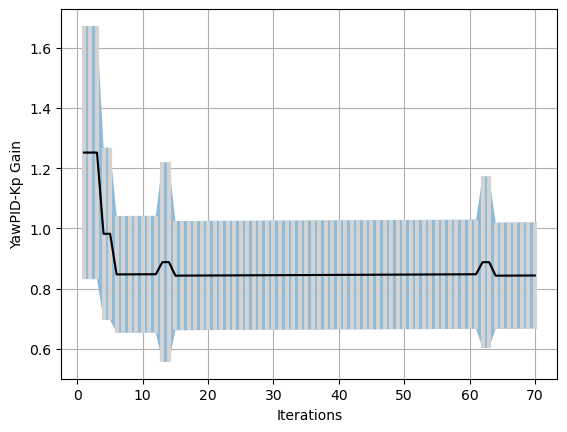

In [68]:
print(len(yawKp_avg))
print(np.linspace(1, len(yawKp_avg), len(yawKp_avg)).astype(int))
print(yawKp_avg)
plt.grid()
x = np.linspace(1, len(yawKp_avg), len(yawKp_avg)).astype(int)
plt.plot(x, yawKp_avg)
plt.fill_between(x, yawKp_avg - yawKp_std, yawKp_avg + yawKp_std, alpha=0.5)
plt.errorbar(x, yawKp_avg, yerr=yawKp_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Yaw-Kp over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("YawPID-Kp Gain")
plt.show()


70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.42058124 0.42058124 0.42058124 0.28621996 0.28621996 0.19400926
 0.19400926 0.19400926 0.19400926 0.19400926 0.19400926 0.19400926
 0.33138379 0.33138379 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531 0.18133531
 0.18133531 0.28505667 0.28505667 0.17637125 0.17637125 0.17637125
 0.17637125 0.17637125 0.17637125 0.17637125]


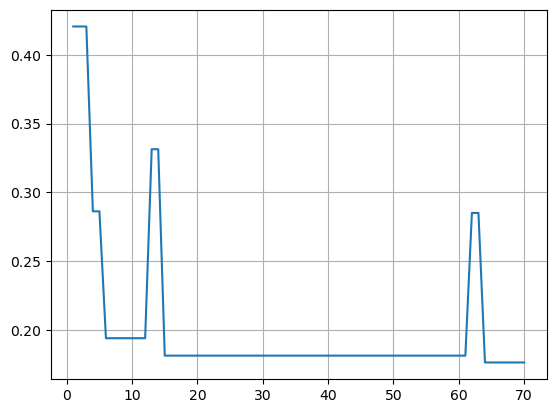

In [53]:
print(len(yawKp_std))
print(np.linspace(1, len(yawKp_std), len(yawKp_std)).astype(int))
print(yawKp_std)
plt.grid()
plt.plot(np.linspace(1, len(yawKp_std), len(yawKp_std)).astype(int), yawKp_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.05741685 0.05741685 0.05751685 0.05823685 0.05833685 0.06014185
 0.06024185 0.06204685 0.06214685 0.06410685 0.06420685 0.06632185
 0.06642185 0.06853685 0.06863685 0.07059685 0.07100685 0.07296685
 0.07322185 0.07533685 0.07559185 0.07786185 0.07827185 0.08038685
 0.08079685 0.08291185 0.08332185 0.08543685 0.08584685 0.08796185
 0.08852685 0.09064185 0.09120685 0.09332185 0.09388685 0.09600185
 0.09656685 0.09868185 0.09940185 0.10167185 0.10223685 0.10450685
 0.10522685 0.10734185 0.10790685 0.11017685 0.11105185 0.11316685
 0.11388685 0.11600185 0.11672185 0.11883685 0.11955685 0.12182685
 0.12270185 0.12481685 0.12569185 0.12796185 0.12883685 0.13110685
 0.13198185 0.13425185 0.13512685 0.13739685 0.13827185 0.13058185
 0.13130185 0.13357185 0.13429185 0.13656185]


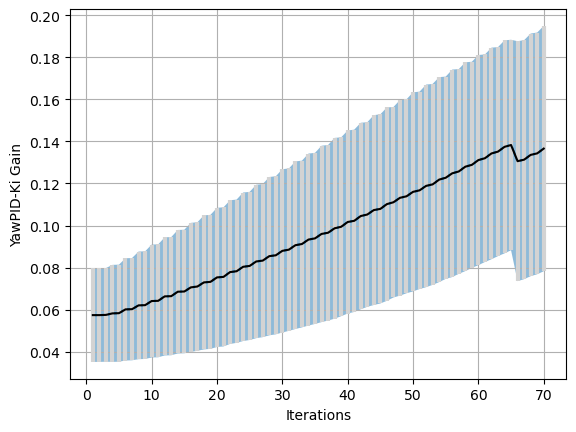

In [69]:
print(len(yawKi_avg))
print(np.linspace(1, len(yawKi_avg), len(yawKi_avg)).astype(int))
print(yawKi_avg)
plt.grid()
x = np.linspace(1, len(yawKi_avg), len(yawKi_avg)).astype(int)
plt.plot(x, yawKi_avg)
plt.fill_between(x, yawKi_avg - yawKi_std, yawKi_avg + yawKi_std, alpha=0.5)
plt.errorbar(x, yawKi_avg, yerr=yawKi_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Yaw-Ki over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("YawPID-Ki Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.02224984 0.02224984 0.02224984 0.02306159 0.02306159 0.02430419
 0.02430419 0.02557943 0.02557943 0.02683773 0.02683773 0.02808565
 0.02808565 0.02935501 0.02935501 0.03066527 0.03054756 0.03186306
 0.03184629 0.03307849 0.0330667  0.03414508 0.03405057 0.03529431
 0.03520971 0.03645674 0.03638145 0.03763114 0.03756461 0.03881644
 0.03858573 0.03983683 0.03961934 0.04086937 0.0406645  0.04191317
 0.04172032 0.04296739 0.04250431 0.04350102 0.04332523 0.04432624
 0.04387751 0.04512033 0.04496049 0.04595934 0.0452585  0.046498
 0.04608675 0.04732435 0.04690636 0.04814235 0.04775827 0.04871893
 0.04807392 0.04930598 0.04866415 0.04962728 0.04899212 0.04995566
 0.04932715 0.05029096 0.04966912 0.05063306 0.05001788 0.05702645
 0.05680074 0.05766438 0.05744453 0.05831017]


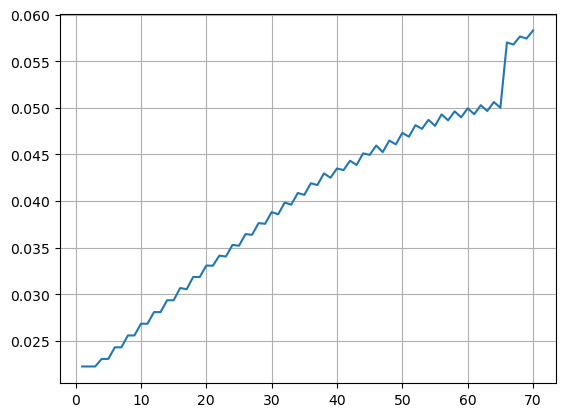

In [55]:
print(len(yawKi_std))
print(np.linspace(1, len(yawKi_std), len(yawKi_std)).astype(int))
print(yawKi_std)
plt.grid()
plt.plot(np.linspace(1, len(yawKi_std), len(yawKi_std)).astype(int), yawKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.77849889 0.77849889 0.77859889 0.74869389 0.74879389 0.53885889
 0.53895889 0.53905889 0.53915889 0.53925889 0.53935889 0.53945889
 0.80949889 0.80959889 0.53965389 0.53975389 0.47980889 0.51990389
 0.42998889 0.40008389 0.31016889 0.31026889 0.31036889 0.35046389
 0.35056389 0.32065889 0.32075889 0.36085389 0.36095389 0.37104389
 0.37114389 0.42122889 0.46132389 0.44140889 0.38149889 0.32158889
 0.32168889 0.29178389 0.29188389 0.26197889 0.26207889 0.27216889
 0.27226889 0.24236389 0.24246389 0.28255889 0.28265889 0.25275389
 0.25285389 0.22294889 0.22304889 0.22314889 0.22324889 0.22334889
 0.22344889 0.22354889 0.22364889 0.22374889 0.22384889 0.22394889
 0.26404389 0.26414389 0.23423889 0.27433389 0.31442889 0.28452389
 0.25461889 0.33470889 0.37480389 0.31489389]


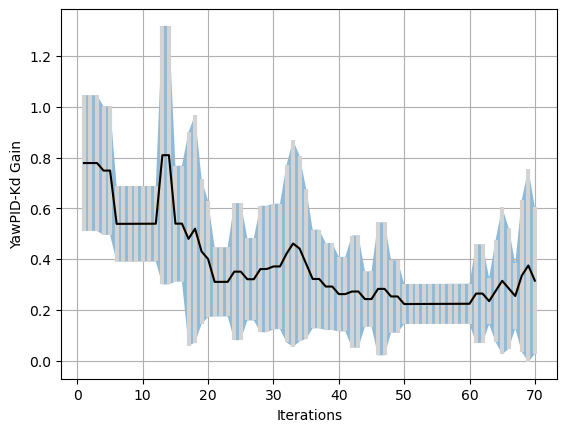

In [70]:
print(len(yawKd_avg))
print(np.linspace(1, len(yawKd_avg), len(yawKd_avg)).astype(int))
print(yawKd_avg)
x = np.linspace(1, len(yawKd_avg), len(yawKd_avg)).astype(int)
plt.grid()
plt.plot(x, yawKd_avg, color='orange')
plt.fill_between(x, yawKd_avg - yawKd_std, yawKd_avg + yawKd_std, alpha=0.5)
plt.errorbar(x, yawKd_avg, yerr=yawKd_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Yaw-Kd over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("YawPID-Kd Gain")
plt.show()


70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.26743778 0.26743778 0.26743778 0.25364712 0.25364712 0.14885602
 0.14885602 0.14885602 0.14885602 0.14885602 0.14885602 0.14885602
 0.50925925 0.50925925 0.22821911 0.22821911 0.42064421 0.4491095
 0.28591336 0.22820087 0.13620404 0.13620404 0.13620404 0.26998673
 0.26998673 0.16257222 0.16257222 0.24909679 0.24909679 0.24724301
 0.24724301 0.34976814 0.40733988 0.36592043 0.29571396 0.19424082
 0.19424082 0.17152957 0.17152957 0.1467252  0.1467252  0.22077712
 0.22077712 0.10879394 0.10879394 0.26195759 0.26195759 0.14256529
 0.14256529 0.07898955 0.07898955 0.07898955 0.07898955 0.07898955
 0.07898955 0.07898955 0.07898955 0.07898955 0.07898955 0.07898955
 0.19422877 0.19422877 0.0916983  0.20121281 0.28975121 0.23789721
 0.12840501 0.29959579 0.38001501 0.28888101]


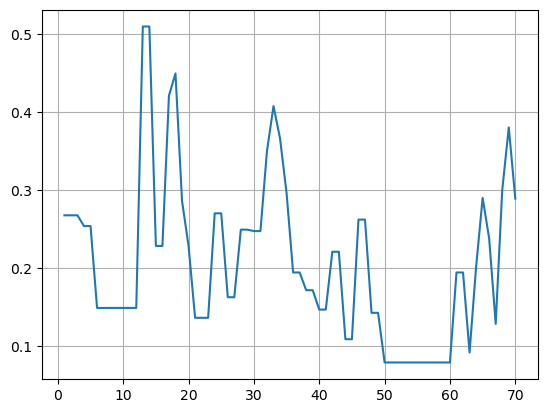

In [57]:
print(len(yawKd_std))
print(np.linspace(1, len(yawKd_std), len(yawKd_std)).astype(int))
print(yawKd_std)
plt.grid()
plt.plot(np.linspace(1, len(yawKd_std), len(yawKd_std)).astype(int), yawKd_std)

70
max-throttleKp: 1.5223578119999999
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781 1.52235781
 1.52235781

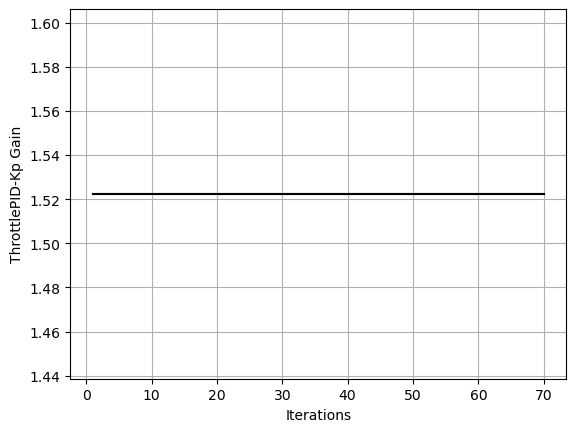

In [58]:
print(len(throttleKp_avg))
print("max-throttleKp: {}".format(throttleKp_avg.max()))
print(np.linspace(1, len(throttleKp_avg), len(throttleKp_avg)).astype(int))
print(throttleKp_avg)
x = np.linspace(1, len(throttleKp_avg), len(throttleKp_avg)).astype(int)
plt.grid()
plt.plot(x, throttleKp_avg, color='orange')
plt.fill_between(x, throttleKp_avg - throttleKp_std, throttleKp_avg + throttleKp_std, alpha=0.5)
plt.errorbar(x, throttleKp_avg, yerr=throttleKp_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Throttle-Kp over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("ThrottlePID-Kp Gain")
plt.show()

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.220

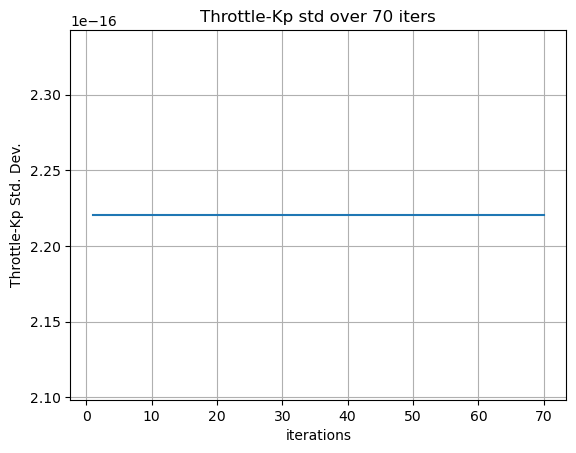

In [59]:
print(len(throttleKp_std))
print(np.linspace(1, len(throttleKp_std), len(throttleKp_std)).astype(int))
print(throttleKp_std)
plt.title("Throttle-Kp std over 70 iters")
plt.xlabel("iterations")
plt.ylabel("Throttle-Kp Std. Dev.")
plt.grid()
plt.plot(np.linspace(1, len(throttleKp_std), len(throttleKp_std)).astype(int), throttleKp_std)

In [60]:
throttleKpKd_arr = np.dstack((throttleKp_avg, throttleKd_avg))
for param in throttleKpKd_arr:
    print(param)

[[1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]
 [1.52235781 0.57063988]


70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552 0.22192552
 0.22192552 0.22192552 0.22192552 0.22192552]


Text(0, 0.5, 'ThrottlePID-Ki Gain')

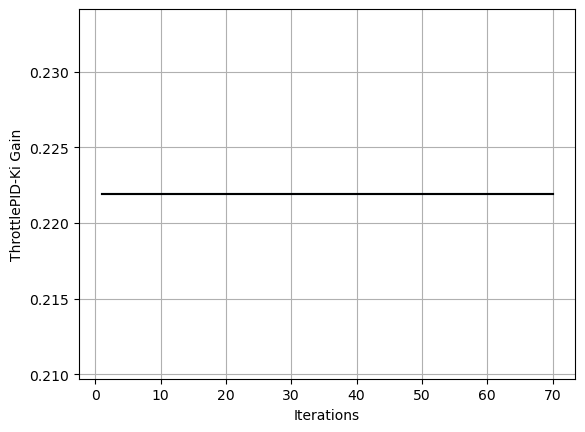

In [61]:
print(len(throttleKi_avg))
print(np.linspace(1, len(throttleKi_avg), len(throttleKi_avg)).astype(int))
print(throttleKi_avg)
plt.grid()
x = np.linspace(1, len(throttleKi_avg), len(throttleKi_avg)).astype(int)
plt.plot(x, throttleKi_avg)
plt.fill_between(x, throttleKi_avg - throttleKi_std, throttleKi_avg + throttleKi_std, alpha=0.5)
plt.errorbar(x, throttleKi_avg, yerr=throttleKi_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Throttle-Ki over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("ThrottlePID-Ki Gain")


70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.77555756e-17
 2.77555756e-17 2.77555756e-17 2.77555756e-17 2.775

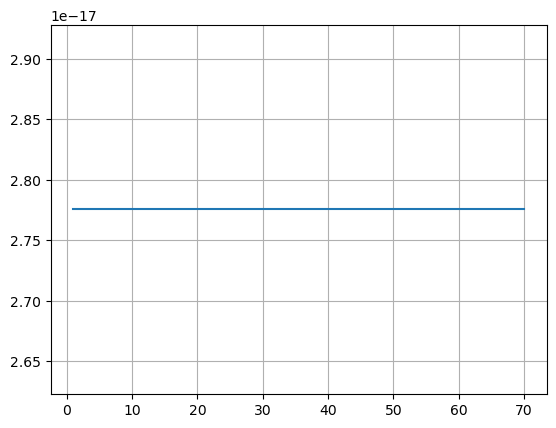

In [62]:
print(len(throttleKi_std))
print(np.linspace(1, len(throttleKi_std), len(throttleKi_std)).astype(int))
print(throttleKi_std)
plt.grid()
plt.plot(np.linspace(1, len(throttleKi_std), len(throttleKi_std)).astype(int), throttleKi_std)

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988 0.57063988
 0.57063988 0.57063988 0.57063988 0.57063988]


Text(0, 0.5, 'ThrottlePID-Kd Gain')

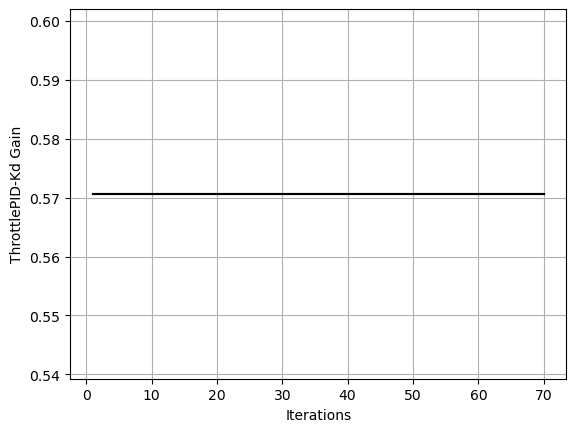

In [63]:
print(len(throttleKd_avg))
print(np.linspace(1, len(throttleKd_avg), len(throttleKd_avg)).astype(int))
print(throttleKd_avg)
plt.grid()
x = np.linspace(1, len(throttleKd_avg), len(throttleKd_avg)).astype(int)
plt.plot(x, throttleKd_avg)
plt.fill_between(x, throttleKd_avg - throttleKd_std, throttleKd_avg + throttleKd_std, alpha=0.5)
plt.errorbar(x, throttleKd_avg, yerr=throttleKd_std, color='black', ecolor='lightgray', elinewidth=3)
#plt.title("Throttle-Kd over 70 iters (mean, std)")
plt.xlabel("Iterations")
plt.ylabel("ThrottlePID-Kd Gain")

70
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.110

Text(0, 0.5, 'Throttle-Kd Std. Dev.')

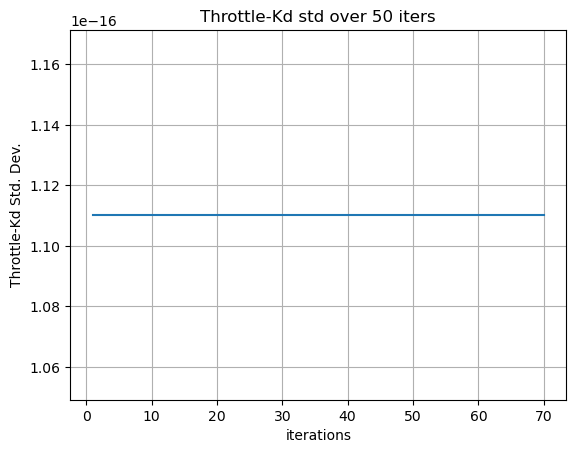

In [64]:
print(len(throttleKd_std))
print(np.linspace(1, len(throttleKd_std), len(throttleKd_std)).astype(int))
print(throttleKd_std)
plt.grid()
plt.plot(np.linspace(1, len(throttleKd_std), len(throttleKd_std)).astype(int), throttleKd_std)
plt.title("Throttle-Kd std over 50 iters")
plt.xlabel("iterations")
plt.ylabel("Throttle-Kd Std. Dev.")

In [65]:
#best_param_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv1_250iters\gbest_params.npy"
#best_param_dir = os.getcwd() + r"\archived\archived_file_PC_xyposALLv3_70iters\gbest_params.npy"
#best_param_dir = os.getcwd() + r"\archived\archived_file_PC_throttle_ALLv2_70iters\gbest_params.npy"
best_param_dir = os.getcwd() + r"\gbest_params.npy"

#best_param_dir = os.getcwd() + r"\archived\archived_file_v17_yposKd_100iters\gbest_params.npy"
gbest_params = np.load(best_param_dir, allow_pickle=True)

for param in gbest_params:
    print("{}".format(param))

1.3703715298060144
0.07251380528990564
0.4015673763427212


70
[3.18953474 3.07493508 3.46429248 3.438746   3.51978855 3.40613016
 3.51191155 3.28482927 3.30130913 3.36486826 3.27202024 3.32182813
 3.47811979 3.38456441 3.33165743 3.29752648 3.01541353 3.26025413
 3.47222975 3.2066121  3.03146495 3.23560778 3.19634613 3.27565952
 3.17639968 3.23942877 3.09372859 3.14583663 3.22013507 3.32859223
 3.336981   3.27030149 3.41116121 3.36898379 3.18062588 3.07367316
 3.37453264 3.51881085 3.07251908 3.26354524 3.41194112 3.27284751
 2.90249948 2.99263215 3.14224953 2.99222856 3.23847925 3.11511971
 2.91529165 3.12982061 3.16210573 2.93803687 3.13744381 2.92751235
 3.00530246 3.19358878 3.04607789 3.24225126 3.0849361  3.02649444
 3.0358172  3.03530948 2.97979443 2.99403401 2.95922598 2.90356226
 3.13791227 3.30315374 3.23378572 3.2506662 ]


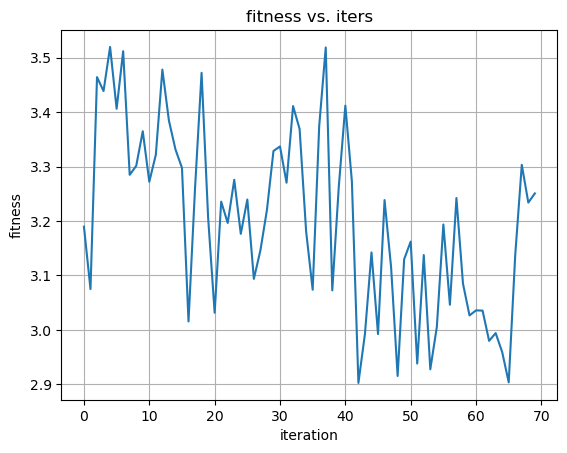

In [66]:
fitness_arr = np.load(os.getcwd() + "\\fitness_list.npy")
print(len(fitness_arr))
print(fitness_arr)
plt.plot(np.arange(70), fitness_arr)
plt.title("fitness vs. iters")
plt.xlabel("iteration")
plt.ylabel("fitness")
plt.grid()
plt.show()

In [67]:
gbest_arr = np.load(os.getcwd() + "\\gbest_params.npy")
print(gbest_arr)

[1.37037153 0.07251381 0.40156738]
